In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import seaborn as sns

C:\Users\omer\AppData\Local\Temp\ipykernel_67660\609083860.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from enums import stage_dict, char_dict, platform_dict, dan_names_dict, battle_type_dict
from read_data import read_data_into_dataframe, read_data_into_dataframe_v2
from data_processing import get_unique_players, calculate_win_rates_with_confidence_interval, get_most_popular_characters, get_rank_distribution, split_unique_players, split_replays_into_categories, calculate_percentiles
from plotting import plot_win_rates, plot_most_popular_characters, plot_rank_distribution, plot_win_rates_with_confidence_intervals

In [3]:
%matplotlib inline  

In [4]:
jsons_directory = './output/data_7'
master_df = read_data_into_dataframe_v2(jsons_directory)

Read 12 games from 0 files
0 files were unable to be read


In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7874228 entries, 6 to 747192
Data columns (total 30 columns):
 #   Column            Dtype         
---  ------            -----         
 0   battle_at         datetime64[ns]
 1   battle_id         object        
 2   battle_type       int64         
 3   game_version      int64         
 4   p1_area_id        float64       
 5   p1_chara_id       int64         
 6   p1_lang           object        
 7   p1_name           object        
 8   p1_polaris_id     object        
 9   p1_power          int64         
 10  p1_rank           int64         
 11  p1_rating_before  int64         
 12  p1_rating_change  int64         
 13  p1_region_id      float64       
 14  p1_rounds         int64         
 15  p1_user_id        int64         
 16  p2_area_id        float64       
 17  p2_chara_id       int64         
 18  p2_lang           object        
 19  p2_name           object        
 20  p2_polaris_id     object        
 21  p2_power      

In [ ]:
# find all games where ther players name is 'AfroBuddha'
player_name = 'AfroBuddha'
player_df = master_df[(master_df['p1_area_id'] == 5) | (master_df['p2_area_id'] == 5)]
player_df.head()

In [6]:
master_df.to_csv('output/replays.csv')
master_df.to_json('output/replays.json')

ValueError: DataFrame index must be unique for orient='columns'.

battle_at
2024-11-30    743726
2024-11-23    727383
2024-11-24    719165
2024-11-22    656149
2024-11-28    653246
2024-11-29    650337
2024-11-27    631420
2024-11-19    623689
2024-11-26    618896
2024-11-20    616344
2024-11-21    615608
2024-11-25    609767
2024-11-18      8492
2024-12-01         6
Name: count, dtype: int64
2024-11-18 to 2024-12-01


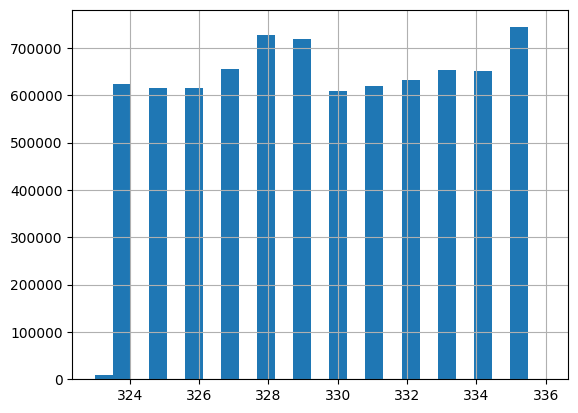

In [7]:
# convert from unix timestamp to datetime
master_df['battle_at'] = pd.to_datetime(master_df['battle_at'], unit='s')

#print the unique dates that games were played on as well as the number of games played on each date
print(master_df['battle_at'].dt.date.value_counts())

# plot distribution of time of day game was played
master_df['battle_at'].dt.dayofyear.hist(bins=25)

# get the date range of the data as a human readable string
data_date_range = f"{master_df['battle_at'].dt.date.min()} to {master_df['battle_at'].dt.date.max()}"
print(data_date_range)

In [8]:
unique_players = get_unique_players(master_df)
beginner_players, intemediate_players, advanced_players, master_players = split_unique_players(unique_players)
beginner_games, intermediate_games, advanced_games, master_games = split_replays_into_categories(master_df)

In [9]:
unique_players

{'55m3J227Yi4j': {'rank': 20,
  'char': 34,
  'tekken_power': 155398,
  'area': 3.0,
  'lang': 'en',
  'region': 3.0,
  'rating': 1493,
  'characters': {34}},
 '37j3eyeLrTQE': {'rank': 20,
  'char': 9,
  'tekken_power': 171488,
  'area': 3.0,
  'lang': 'en',
  'region': 3.0,
  'rating': 1356,
  'characters': {9}},
 '4LABdTLtE5Gf': {'rank': 22,
  'char': 7,
  'tekken_power': 223561,
  'area': 6.0,
  'lang': 'de',
  'region': 4.0,
  'rating': 1658,
  'characters': {7}},
 '3hBEQQYyfh86': {'rank': 22,
  'char': 9,
  'tekken_power': 198711,
  'area': 6.0,
  'lang': 'de',
  'region': 4.0,
  'rating': 1614,
  'characters': {4, 9}},
 '3ah8rLjha2ay': {'rank': 13,
  'char': 29,
  'tekken_power': 135255,
  'area': 3.0,
  'lang': 'en',
  'region': 3.0,
  'rating': 1184,
  'characters': {29}},
 '3nHjJYiA9NaE': {'rank': 13,
  'char': 4,
  'tekken_power': 167846,
  'area': 3.0,
  'lang': 'en',
  'region': 3.0,
  'rating': 1336,
  'characters': {4, 22}},
 '3dEBRNBBd9H8': {'rank': 24,
  'char': 33,
  '

In [10]:
print('Number of unique players:', len(unique_players))
print('Number of beginner players:', len(beginner_players))
print('Number of intermediate players:', len(intemediate_players))
print('Number of advanced players:', len(advanced_players))
print('Number of master players:', len(master_players))
print('')
print('Number of unique games:', len(master_df))
print('Number of beginner games:', len(beginner_games))
print('Number of intermediate games:', len(intermediate_games))
print('Number of advanced games:', len(advanced_games))
print('Number of master games:', len(master_games))

print('')
print(f'{len(master_df) - (len(beginner_games) + len(intermediate_games) + len(advanced_games) + len(master_games))} games were not categorized as they were played by players of from different categories')

Number of unique players: 218889
Number of beginner players: 55040
Number of intermediate players: 110199
Number of advanced players: 48024
Number of master players: 5626

Number of unique games: 7874228
Number of beginner games: 883419
Number of intermediate games: 3921812
Number of advanced games: 2361070
Number of master games: 317373

390554 games were not categorized as they were played by players of from different categories


In [ ]:
brackets_dict = {
	'beginner': {
		'players': beginner_players,
		'games': beginner_games,
		},
	'intermediate': {
		'players': intemediate_players,
		'games': intermediate_games,
	},
	'advanced': {
		'players': advanced_players,
		'games': advanced_games,
	},
	'master': {
		'players': master_players,
		'games': master_games,
	},
} 


In [ ]:
char_dict[40] = 'Heihachi'

In [ ]:
rank_counts = get_rank_distribution(unique_players)
plot_rank_distribution(rank_counts, date_range=data_date_range)
character_counts = get_most_popular_characters(unique_players)
plot_most_popular_characters(character_counts, 'all', date_range=data_date_range)
win_rates, intervals = calculate_win_rates_with_confidence_interval(master_df)
plot_win_rates(win_rates, 'all', date_range=data_date_range)


for bracket in brackets_dict:
    character_counts = get_most_popular_characters(brackets_dict[bracket]['players'])
    games = brackets_dict[bracket]['games']
    win_rates, intervals = calculate_win_rates_with_confidence_interval(games)
    min_winrate = np.array(list(intervals.values())).min()
    max_winrate = np.array(list(intervals.values())).max()
    graph_limits = (min(min_winrate - 0.05, 0.45) , max(max_winrate + 0.05, 0.6))
    print('graph_limits', graph_limits)
    plot_most_popular_characters(character_counts, bracket, date_range=data_date_range)
    plot_win_rates_with_confidence_intervals(win_rates, intervals, bracket_name=bracket, ylim=graph_limits, date_range=data_date_range)

In [ ]:
calculate_percentiles(rank_counts)

In [ ]:
# quick test to make sure the average win rate is close to 50%
# it should be exactly 50% since there is a win and a loss for each game
# but that is not the case since we are not considering the play rate of each character in this simple calculation

win_rates, _ = calculate_win_rates_with_confidence_interval(master_df)

average_win_rate = sum(win_rates.values()) / len(win_rates)
if abs(average_win_rate - 0.5) < 0.05:
    print(f"The average win rate ({average_win_rate}) is close to 50%.")
else:
    print(f"The average win rate ({average_win_rate})is not close to 50%.")


In [ ]:
master_player_main_win_rates = {}

# iterate over master players and get the win rate for each player
for key, value in master_players.items():
    # we will only consider games where the player played their main character
    # first let's find games where the player was player 1
    player_games = master_games[master_games['p1_polaris_id'] == key]
    
    # now let's filter out games where the player did not play their main character
    player_games = player_games[player_games['p1_chara_id'] == value['char']]
    
    # now do the same for games where the player was player 2
    player_games_2 = master_games[master_games['p2_polaris_id'] == key]
    player_games_2 = player_games_2[player_games_2['p2_chara_id'] == value['char']]
    
    # combine the two dataframes
    player_games = pd.concat([player_games, player_games_2])
    
    # we will only consider players who have played at least 10 games
    if len(player_games) < 10:
        continue
    
    # calculate the win rate. remember that the player can be player 1 or player 2
    # so we need to check which player the player was in each game
    wins = 0
    losses = 0
    for index, row in player_games.iterrows():
        if row['p1_polaris_id'] == key:
            if row['winner'] == 1:
                wins += 1
            else:
                losses += 1
        else:
            if row['winner'] == 2:
                wins += 1
            else:
                losses += 1
    win_rate = wins / (wins + losses)
    
    if master_player_main_win_rates.get(value['char']) is None:
        master_player_main_win_rates[value['char']] = [win_rate]
    else:
        master_player_main_win_rates[value['char']].append(win_rate)
    

In [ ]:
# get minimum length of win rates
min_len = min([len(master_player_main_win_rates[char]) for char in master_player_main_win_rates])

# randomly sample win rates to make them the same length and store in a new dictionary
master_player_main_win_rates_sampled = {}
for char in master_player_main_win_rates:
    master_player_main_win_rates_sampled[char] = np.random.choice(master_player_main_win_rates[char], min_len)
    
# get the average win rate for each character
average_win_rates = {char: sum(win_rates) / len(win_rates) for char, win_rates in master_player_main_win_rates.items()}

# plot the average win rate for each character replacing the character id with the character name
average_win_rates = {char_dict[char]: win_rate for char, win_rate in average_win_rates.items()}
# sort the dictionary by win rate
average_win_rates = dict(sorted(average_win_rates.items(), key=lambda x: x[1], reverse=True))
plt.figure(figsize=(10, 5))
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)
plt.ylim(0.4, 0.6)
plt.bar(average_win_rates.keys(), average_win_rates.values())
plt.xlabel('Character')
plt.ylabel('Win Rate')
plt.title('Average Master Player Win Rate when playing their mains')
plt.xticks(rotation=90)
plt.show()

In [ ]:
unique_players[0]

In [ ]:
plot_rank_distribution(rank_counts)

In [ ]:
# # generate plots for each character
# for char in char_dict.keys():
#     print(f'{char}: {char_dict[char]}')

#     char_games = master_df[(master_df['p1_chara_id'] == char) | (master_df['p2_chara_id'] == char)]
     
#     # plot distribution of rank for games with this character
#     char_rank_counts = get_rank_distribution(get_unique_players(char_games))
#     plot_rank_distribution(char_rank_counts, data_date_range, title=f'Rank Distribution {char_dict[char]}')

In [ ]:
# let's save the unique players dictionary to a csv file

with open('unique_players.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(['user_id', 'rank', 'char', 'platform', 'tekken_power', 'characters'])
    for user_id, data in unique_players.items():
        writer.writerow([user_id, data['rank'], data['char'], platform_dict[data['platform']], data['tekken_power'], data['characters']])

# now let's do the same for the master dataframe
    
# let's first remove duplicate replays based on the battleId   

# let's save the master dataframe to a csv file
master_df.to_csv('replays.csv', index=False)

In [ ]:
def calculate_daily_win_rates(games_df):
    # let's calculate win rates over time for each character
    # we want to graph the daily win rate for each character
    # we will use a rolling window of 3 days
    # first we need to sort the dataframe by battle_at
    games_df = games_df.sort_values('battle_at')

    # now we will calculate the win rate for each character for each day

    # let's create a new dataframe to store the win rates
    char_win_rates = pd.DataFrame(columns=['date', 'char', 'win_rate'])

    # now we will iterate over the dataframe and calculate the win rate for each character for each day
    # the battle_at column is already sorted but it contains the time as a unix timestamp
    # we need to convert it to a date so that we can group the data by date

    # let's convert the battle_at column to a datetime object
    games_df['battle_at'] = pd.to_datetime(games_df['battle_at'], unit='s')

    # let's group the data by date 
    grouped = games_df.groupby(games_df['battle_at'].dt.date)

    # now we will iterate over the groups and calculate the win rate for each character for each day
    for date, group in grouped:
        print(date)

    # let's calculate the win rate for each character for each day
    for date, group in grouped:
        for char in char_dict.keys():
            char_games = group[(group['p1_chara_id'] == char) | (group['p2_chara_id'] == char)]
        # to get character wins we need to check if the character is player 1 and if player 1 won
        # or if the character is player 2 and if player 2 won
            char_wins = char_games[(char_games['p1_chara_id'] == char) & (char_games['winner'] == 1) | (char_games['p2_chara_id'] == char) & (char_games['winner'] == 2)]
            try:
                win_rate = len(char_wins) / len(char_games)
            except ZeroDivisionError:
                win_rate = 0
            char_win_rates = pd.concat([char_win_rates, pd.DataFrame({'date': [date], 'char': [char], 'win_rate': [win_rate]})])


    char_win_rates['date'] = pd.to_datetime(char_win_rates['date'])
    char_win_rates = char_win_rates.sort_values('date')
    char_win_rates = char_win_rates.set_index('date')
    
    plt.figure(figsize=(20, 10))
    ax = plt.subplot(111)
    plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)

    # let's plot the win rates for each character ignoring the first and last days
    # let's consider only the top 10 characters
    top_10_chars = char_win_rates.groupby('char').mean().sort_values('win_rate', ascending=False).head(10).index

    for char in top_10_chars:
        char_win_rate = char_win_rates[char_win_rates['char'] == char][1:-1]
        char_win_rate['win_rate'].rolling(window=3, closed='both').mean().plot(label=char_dict[char])

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Win Rates Over Time')
    plt.xlabel('Date')
    plt.ylabel('Win Rate')
    plt.show()


In [ ]:
calculate_daily_win_rates(advanced_games)

In [ ]:
plt.figure(figsize=(20, 10))
ax = plt.subplot(111)
plt.axhline(y=0.5, color='black', linestyle='--', alpha=0.3)

for char in char_dict.keys():
    char_win_rate = char_win_rates[char_win_rates['char'] == char][1:-1]
    char_win_rate['win_rate'].rolling(window=3, closed='both').mean().plot(label=char_dict[char])

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Win Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Win Rate')
plt.show()


In [13]:
unique_players_df = pd.DataFrame.from_dict(unique_players, orient='index')

Text(0.5, 0, 'Rating')

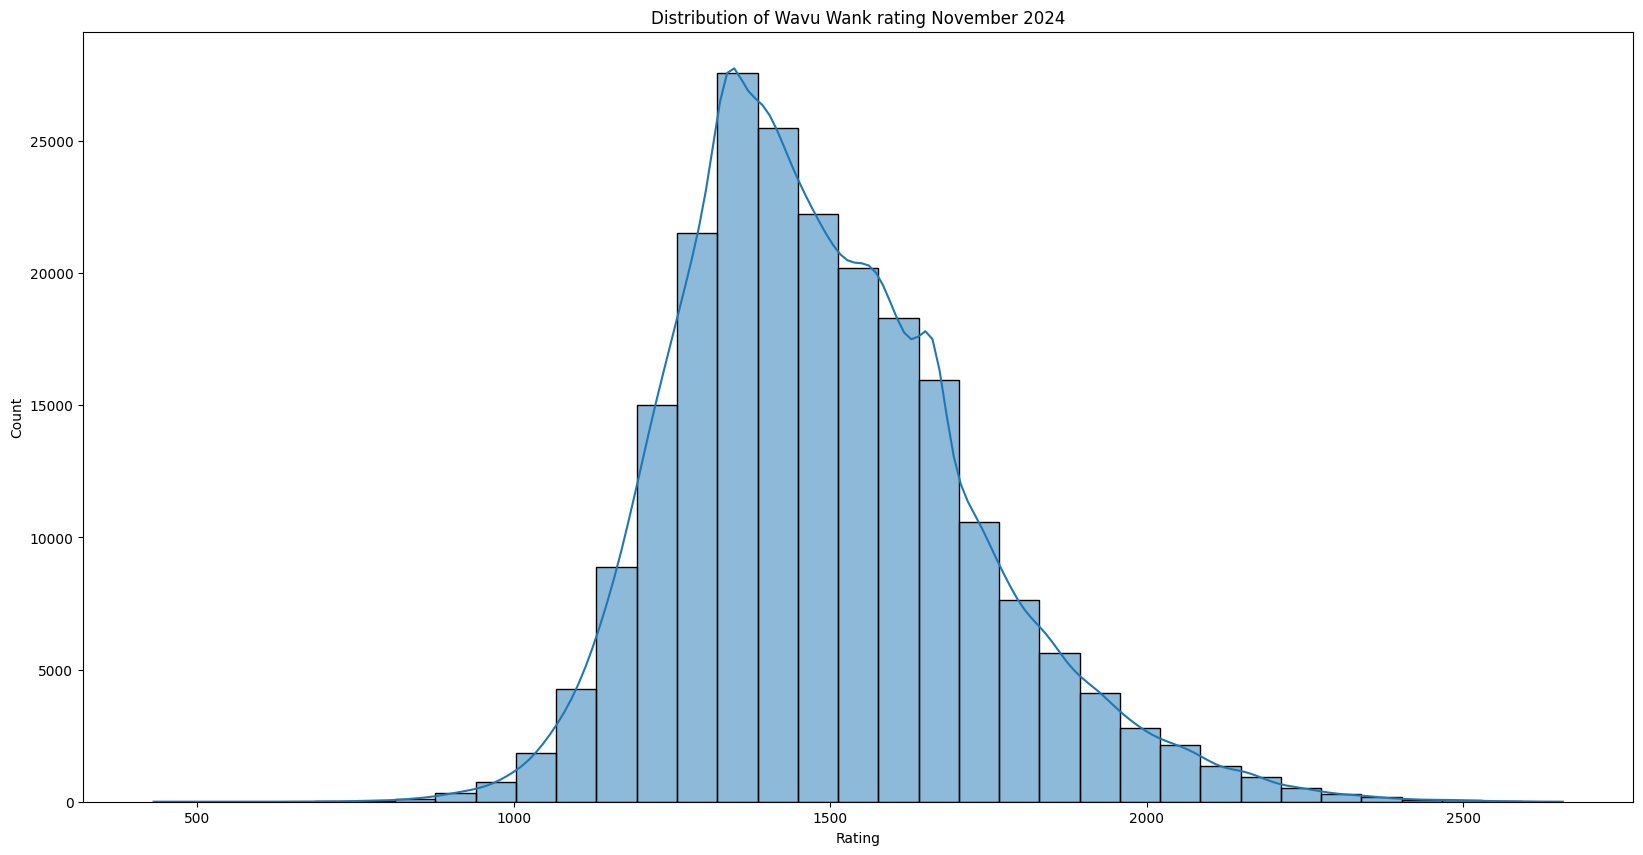

In [33]:
# let's plot a distibution of ratings 
plt.figure(figsize=(20, 10))
sns.histplot(unique_players_df, x='rating', bins=35, kde=True)
plt.title('Distribution of Wavu Wank rating November 2024')
plt.xlabel('Rating')

In [32]:
# let's also get percentiles for the player ratings moving in steps of 5%

for i in range(0,100,5):
    print("%.2f" % i, unique_players_df['rating'].quantile(i/100))


0.00 431.0
5.00 1161.0
10.00 1221.0
15.00 1263.0
20.00 1297.0
25.00 1327.0
30.00 1349.0
35.00 1376.0
40.00 1401.0
45.00 1429.0
50.00 1458.0
55.00 1489.0
60.00 1523.0
65.00 1557.0
70.00 1591.0
75.00 1630.0
80.00 1665.0
85.00 1722.0
90.00 1796.0
95.00 1915.0


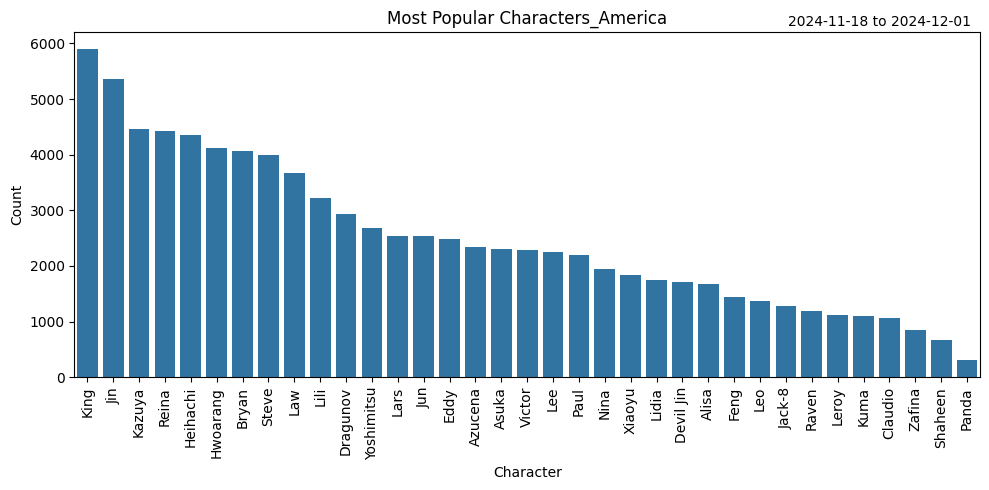

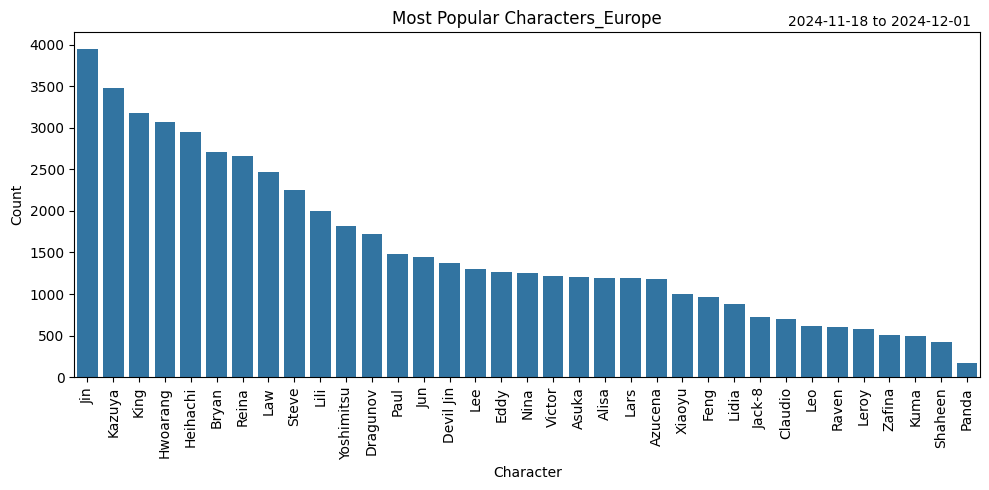

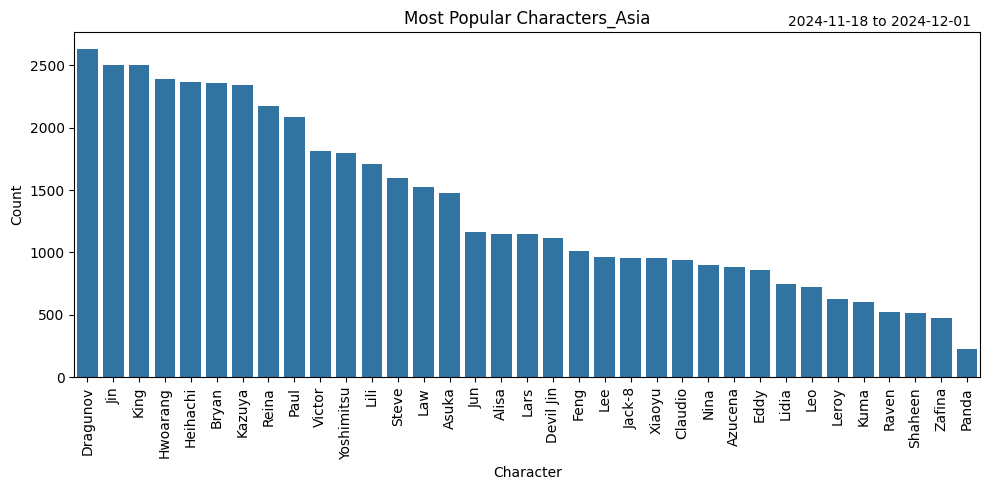

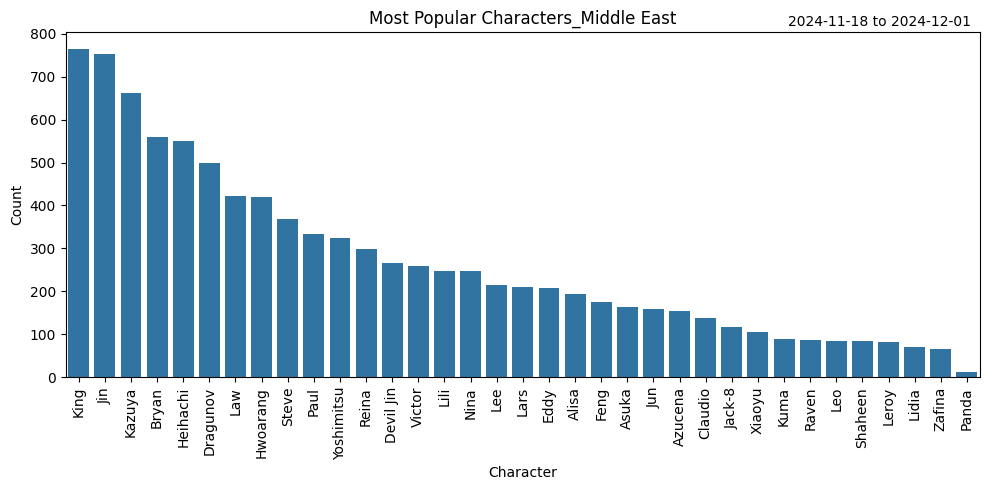

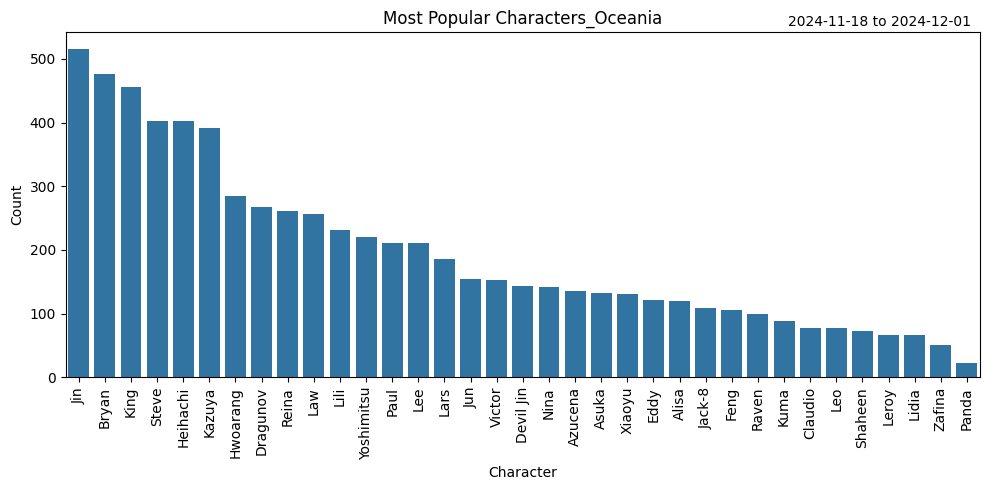

KeyError: nan

In [63]:
# finally let's get character play rates by region

region_dict = {
    0: 'Asia',
    1: 'Middle East',
    2: 'Oceania',
    3: 'America',
    4: 'Europe',
}

# Split unique players into regions
regions = unique_players_df['region'].unique()
players_by_region = {region: unique_players_df[unique_players_df['region'] == region] for region in regions}

# Calculate character play rates by region
character_play_rates_by_region = {}
for region, players in players_by_region.items():
    character_play_rates_by_region[region] = character_counts
    character_counts = get_most_popular_characters(players.transpose())
    plot_most_popular_characters(character_counts, f'{region_dict[region]}', date_range=data_date_range)



,rank,char,tekken_power,area,lang,region,rating,characters


In [ ]:
import yaml

character_counts = get_most_popular_characters(unique_players)
win_rates, win_rates_intervals = calculate_win_rates_with_confidence_interval(master_df)
# Calculate win rates for each bracket
beginner_win_rates, beginner_win_rates_intervals = calculate_win_rates_with_confidence_interval(beginner_games)
intermediate_win_rates, intermediate_win_rates_intervals = calculate_win_rates_with_confidence_interval(intermediate_games)
advanced_win_rates, advanced_win_rates_intervals = calculate_win_rates_with_confidence_interval(advanced_games)
master_win_rates, master_win_rates_intervals = calculate_win_rates_with_confidence_interval(master_games)

In [ ]:
# Compile the visual data into a single YAML report
report_data = {
    'Number of unique players': len(unique_players),
    'Number of beginner players': len(beginner_players),
    'Number of intermediate players': len(intemediate_players),
    'Number of advanced players': len(advanced_players),
    'Number of master players': len(master_players),
    'Number of unique games': len(master_df),
    'Number of beginner games': len(beginner_games),
    'Number of intermediate games': len(intermediate_games),
    'Number of advanced games': len(advanced_games),
    'Number of master games': len(master_games),
    'Average win rate': average_win_rate,
    'Rank distribution': rank_counts,
    'Character counts': character_counts,
    'Beginner win rates': beginner_win_rates,
    'Intermediate win rates': intermediate_win_rates,
    'Advanced win rates': advanced_win_rates,
    'Master win rates': master_win_rates,
    'All win rates': win_rates,
    'date_range': data_date_range,
}

with open('report.yaml', 'w') as f:
    yaml.safe_dump(report_data, f, sort_keys=False)


In [ ]:
new_rank_distribution = {
    16: 11330,
    14: 8988,
    8: 3970,
    18: 12113,
    25: 1561,
    13: 8339,
    5: 2897,
    4: 2768,
    17: 10254,
    21: 7883,
    20: 6444,
    19: 7856,
    23: 2785,
    15: 19152,
    10: 5869,
    22: 3987,
    12: 9595,
    11: 6111,
    9: 7078,
    7: 2851,
    29: 252,
    27: 500,
    26: 799,
    1: 2669,
    3: 3233,
    24: 1813,
    2: 2348,
    0: 8208,
    6: 3974,
    28: 251
}

old_rank_distribution = {
    10 : 10906,
    0: 13794,
    14: 13602,
    13: 13279,
    12: 17054,
    9: 13600,
    6: 7239,
    19: 6528,
    17: 11223,
    3: 5641,
    15: 26187,
    16: 13571,
    18: 11564,
    20: 4851,
    11: 10755,
    8: 6847,
    7: 5484,
    4: 5217,
    5: 5123,
    2: 3976,
    21: 5212,
    22: 2450,
    27: 188,
    1: 3779,
    26: 369,
    23: 1554,
    25: 676,
    24: 984,
    28: 97,
    29: 79
}

# Sort the keys
new_rank_distribution = {k: new_rank_distribution[k] for k in sorted(new_rank_distribution)}
old_rank_distribution = {k: old_rank_distribution[k] for k in sorted(old_rank_distribution)}

# replace the rank numbers with the actual rank names
new_rank_distribution = {dan_names_dict[k]: v for k, v in new_rank_distribution.items()}
old_rank_distribution = {dan_names_dict[k]: v for k, v in old_rank_distribution.items()}

# normalize the counts
total = sum(new_rank_distribution.values())
new_rank_distribution = {k: v/total for k, v in new_rank_distribution.items()}

total = sum(old_rank_distribution.values())
old_rank_distribution = {k: v/total for k, v in old_rank_distribution.items()}

# plot old and new rank distributions on the same axes to compare them
# we have to use different colors for each distribution
fig, ax = plt.subplots()
plt.xticks(rotation=45)
bar_positions = np.arange(len(old_rank_distribution))
bar_width = 0.35

ax.bar(bar_positions, old_rank_distribution.values(), width=bar_width, color='blue', label='March 2024')
ax.bar(bar_positions + bar_width, new_rank_distribution.values(), width=bar_width, color='orange', label='April 2024')

ax.set_xlabel('Rank')
ax.set_ylabel('Number of players')
ax.set_title('Rank distribution comparison')
ax.legend()


plt.show()




In [ ]:
# load data from the data folder into a different dataframe
data_directory = './data/'
data_df = read_data_into_dataframe(data_directory)
data_df = data_df[data_df['battleType'] == 2]
data_df.info()

In [ ]:
# convert from unix timestamp to datetime
data_df['battle_at'] = pd.to_datetime(data_df['battle_at'], unit='s')

# plot distribution of time of day game was played
data_df['battle_at'].dt.hour.hist(bins=24)

# get the date range of the data as a human readable string
data_date_range = f"{data_df['battle_at'].dt.date.min()} to {data_df['battle_at'].dt.date.max()}"
print(data_date_range)

In [ ]:
# iterate over the master dataframe and calculate the difference in tekken power for each game
# then calculate the mean difference
ranked_master_df = master_df[master_df['battleType'] == 2]

def calculate_summary_ranked_stats(df):
    import seaborn as sns
    tekken_power_diffs = tekken_power_diffs = (df['1pTekkenPower'] - df['2pTekkenPower']).abs()
    mean_diff = tekken_power_diffs.mean()
    print(f'The mean difference in tekken power is {mean_diff}')

    # also calculate the standard deviation of the difference in tekken power
    std_diff = tekken_power_diffs.std()
    print(f'The standard deviation of the difference in tekken power is {std_diff}')

    # max difference in tekken power
    max_diff = tekken_power_diffs.max()
    print(f'The max difference in tekken power is {max_diff}')

    # plot dstribution of the difference in tekken power using seaborn
    # make sure to give the plot a title, x axis label and useful ticks
    sns.histplot(tekken_power_diffs, kde=True, bins=100)
    plt.xlabel('Difference in tekken power')
    plt.title('Distribution of the difference in tekken power')
    plt.show()

    # find the mean difference in tekken rank 
    # iterate over the master dataframe and calculate the difference in tekken rank for each game
    # making sure to use the absolute value of the difference
    # then calculate the mean difference
    tekken_rank_diffs = (df['1pRank'] - df['2pRank']).abs()
    mean_diff = tekken_rank_diffs.mean()
    print(f'The mean difference in tekken rank is {mean_diff}')

    # plot dstribution of the difference in tekken rank using seaborn
    # make sure to give the x axis a label and useful ticks
    sns.histplot(tekken_rank_diffs, bins=30)
    plt.xlabel('Difference in tekken rank')
    plt.show()    

    
    # also calculate the standard deviation of the difference in tekken rank
    std_diff = tekken_rank_diffs.std()
    print(f'The standard deviation of the difference in tekken rank is {std_diff}')


    # let's also figure out the mean number of rounds in a game
    mean_rounds = df['totalRoundNum'].mean()
    print(f'The mean number of rounds in a game is {mean_rounds}')

    #and also the standard deviation
    std_rounds = df['totalRoundNum'].std()
    print(f'The standard deviation of the number of rounds in a game is {std_rounds}')


    # let's also figure out how much predicitve power the prowess rating has
    # we can do this by calculating the correlation between the prowess rating and the outcome of the game
    # we can use the spearman correlation
    correlation = df['2pTekkenPower'] - df['1pTekkenPower']
    correlation = correlation.corr(df['winResult'], method='spearman')
    print(f'The correlation between the prowess rating and the outcome of the game is {correlation}')


    # let's also figure out how much predicitve power the rank has
    # we can do this by calculating the correlation between the rank and the outcome of the game
    # we can use the spearman correlation
    correlation = df['2pRank'] - df['1pRank']
    correlation = correlation.corr(df['winResult'], method='spearman')
    print(f'The correlation between the rank and the outcome of the game is {correlation}')


In [ ]:
ranked_master_df.info()

In [ ]:
calculate_summary_ranked_stats(ranked_master_df)

In [ ]:
calculate_summary_ranked_stats(data_df)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_rank_distribution(rank_counts, date_range, title):
    labels = [f'{dan_names_dict[k]} ({k})' for k in dan_names_dict.keys()][:-1]
    print(labels)

    x = np.arange(len(labels))
    width = 0.35

    plt.figure(figsize=(10, 5))
    fig, ax = plt.subplots()
    ax.bar(x - width/2, rank_counts[0], width, label=date_range[0])
    ax.bar(x + width/2, rank_counts[1], width, label=date_range[1])


    ax.set_xlabel('Rank')
    ax.set_ylabel('Number of players')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    plt.xticks(rotation=90)

    ax.legend()

    plt.show()


In [ ]:
#TODO: figure out why destroyuers are not being displayed in the rank distribution plot
#TODO: do this with the may vs april data
plot_rank_distribution([rank_counts, rank_counts], ['March 2024', 'April 2024'], 'Rank distribution comparison')

In [ ]:

# plot the distribution of tekkken power for all unique players using a kde plot
tekken_power_values = [data['tekken_power'] for user_id, data in unique_players.items()]
plt.xlabel('Distribution of Tekken Power')
plt.title('Tekken Power')
sns.histplot(tekken_power_values, kde=False, bins=200)

In [ ]:
# let's plot the average tekken power for each rank
average_tekken_power = {}
for rank in dan_names_dict.keys():
    average_tekken_power[rank] = []
    for user_id, data in unique_players.items():
        if data['rank'] == rank:
            average_tekken_power[rank].append(data['tekken_power'])
    average_tekken_power[rank] = np.mean(average_tekken_power[rank])

average_tekken_power = {k: v for k, v in sorted(average_tekken_power.items())}
plt.bar(average_tekken_power.keys(), average_tekken_power.values())
plt.xlabel('Rank')
plt.ylabel('Average Tekken Power')
plt.title('Average Tekken Power for each Rank')
plt.show()

In [ ]:
# get the match up table of each character
# a matchup table is a 2d array where the rows represent the character and the columns represent another character
# each cell in the table represents the win rate of the row character against the column character

def get_match_up_table(master_df):
    
    # remove mirror matches
    master_df = master_df[master_df['p1_chara_id'] != master_df['p2_chara_id']]

    # get the unique characters
    unique_chars = list(char_dict.keys())
    match_up_table = {char_dict[char]: {char_dict[char2]: 0 for char2 in unique_chars} for char in unique_chars}
    
    for i in range(len(unique_chars)):
        for j in range(len(unique_chars)):
            char1 = unique_chars[i]
            char2 = unique_chars[j]
            # get the games where char1 faced char2
            games = master_df[((master_df['p1_chara_id'] == char1) & (master_df['p2_chara_id'] == char2)) | ((master_df['p1_chara_id'] == char2) & (master_df['p2_chara_id'] == char1))]
            # get the games where char1 won
            char1_p1_wins = games[games['winner'] == 1 & (games['p1_chara_id'] == char1)]
            # get the games where char2 won
            char1_p2_wins = games[games['winner'] == 2 & (games['p2_chara_id'] == char1)]
            # combine the wins
            char1_wins = pd.concat([char1_p1_wins, char1_p2_wins])
            
            # calculate the win rate
            if len(games) != 0:
                win_rate = len(char1_wins) / len(games)
                match_up_table[char1][char2] = win_rate
                
    return match_up_table

In [ ]:
get_match_up_table(master_df)